In [1]:
from sympy import *
init_printing()

In [46]:
l2, l3, l4 = symbols('l_2, l_3, l_4')
d1, d4 = symbols('d_1, d_4')
m1, m2, m3, m4, m5 = symbols('m_1, m_2, m_3, m_4, m_5')
g = Symbol('g')

mh, lh, lp, dh, mc, lc, dc = symbols('m_h, l_h, l_p, d_h, m_c, l_c, d_c') 

num_subs = list(zip([m1, m2, m3, m4, m5, l2, l3, l4, d1, d4], [1.47, 0.349*67/91.5, 0.349*24.5/91.5, 0.122, 1.932,
                                                               0.67, 0.245, 0.225, 0.04, 0.1]))

In [3]:
eq_j = Eq(m1*(l2**2+d1**2)+S(1)/S(12)*m2*l2**2+m2*(l2/2)**2+S(1)/S(12)*m3*l3**2+m3*(l3/2)**2+S(1)/S(12)*m4*(l4**2+d4**2)+m4*((l3+l4/2)**2+d4**2)+m5*((l3+l4)**2+d4**2), mh*(lh**2+dh**2)+mc*(lc**2+dc**2))
eq_cos = Eq(m1*l2+m2*l2/2-m3*l3/2-m4*(l3+l4/2)-m5*(l3+l4),mh*lh-mc*lc)
eq_sin = Eq(m1*d1-m4*d4/2-m5*d4,mh*dh-mc*dc)
eq_f = Eq(l2, lh)

In [4]:
solution = solve([eq.subs(num_subs) for eq in [eq_j, eq_cos, eq_sin, eq_f]], [lh,dh,mc,dc])

In [5]:
solution[0][1].subs([(mh, 1.47), (lc, 0.47)])

In [6]:
[eq.subs(num_subs) for eq in [eq_j, eq_cos, eq_sin, eq_f]]

In [7]:
eps = symbols(r"\varepsilon")
beta = atan(d4/l4)

In [8]:
eq_jlamb = Eq(m1*(l2*cos(eps)+d1*sin(eps))**2+m5*((l3+l4)*cos(eps)+d4*sin(eps))**2+m2/12*(l2*cos(eps))**2+m2*(l2/2*cos(eps))**2+m3/3*(l3*cos(eps))**2+m4/12*(l4*cos(eps+beta))**2+m4*((l3+l4/2)*cos(eps))**2, mh*(lh*cos(eps)+dh*sin(eps))**2+mc*(lc*cos(eps)+dc*sin(eps))**2)

In [9]:
abc = eq_jlamb.subs(num_subs)

In [10]:
Eq(abc.lhs.expand(), abc.rhs.expand().collect([cos(eps)*sin(eps), sin(eps)*2, cos(eps)**2]))

In [12]:
eq_j.subs(num_subs)

In [13]:
eq_cos.subs(num_subs)

In [14]:
eq_sin.subs(num_subs)

In [17]:
eq_cos.subs(l2, 0.72).subs(num_subs)

In [38]:
p_phi_1, p_phi_2, mu_phi = [Symbol(tex) for tex in [r"p_{\varphi,1}", r"p_{\varphi,2}", r"\mu_\varphi"]]
p_eps_1, p_eps_2, p_eps_3, mu_eps = [Symbol(tex) for tex in [r"p_{\varepsilon,1}", r"p_{\varepsilon,2}", r"p_{\varepsilon,3}", r"\mu_\varepsilon"]]
p_lamb_1, mu_lamb = [Symbol(tex) for tex in [r"p_{\lambda,1}", r"\mu_\lambda"]]

In [51]:
eq_phi_1 = Eq(p_phi_1, lp**2*mh)
eq_phi_2 = Eq(p_phi_2, 0)
eq_eps_1 = Eq(p_eps_1, mh*dh**2+mc*dc**2+mc*lc**2+mh*lh**2)
eq_eps_2 = Eq(p_eps_2, g*(mh*dh-mc*dc))
eq_eps_3 = Eq(p_eps_3, g*(mh*lh-mc*lc))
eq_lamb_1 = Eq(p_lamb_1, mc*lc**2+mh*lh**2+mh*lp**2)

In [68]:
unknowns = [mh, mc, dh, dc, lc]
sol = solve([eq_phi_1, eq_eps_1, eq_eps_2, eq_eps_3, eq_lamb_1], unknowns)

In [74]:
estimated_subs = [(g, 9.81), (lh, 0.67), (lp, 0.178), (p_phi_1, 0.044), (p_eps_1, 0.9), (p_eps_2, 1.0699), (p_eps_3, 0.8375), (p_lamb_1, 1.3)]

In [76]:
list(zip(unknowns, [entry.subs(estimated_subs) for entry in sol[1]]))

In [78]:
[eq.subs(estimated_subs) for eq in [eq_phi_1, eq_eps_1, eq_eps_2, eq_eps_3, eq_lamb_1]]

In [79]:
[eq_phi_1, eq_eps_1, eq_eps_2, eq_eps_3, eq_lamb_1]

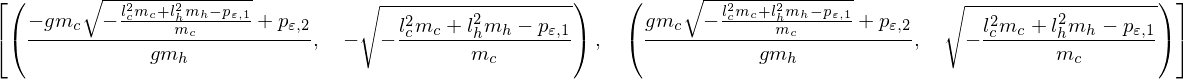

In [82]:
solve([eq_eps_1.subs(dh, 0), eq_eps_2], [dh, dc])